### Regresión logística

Funciona para la clasificación con categorias/clases

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [4]:
df = pd.read_csv('./db/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

Separar los datos para la clasificación

In [12]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df[feature_cols]
y = df['Outcome']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Entrenar el modelo de la regresión logistica. La regresión logistica es una función multivariable, por lo tanto puede tener varios argumetos de entrada

In [16]:
log_reg = LogisticRegression(max_iter=1000) # Importante asignarle numero de iteraciones necesarias
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

Predicciones

In [17]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Generación de la matriz de confución -> Metrica para evaluar algoritmos de clasificación

In [22]:
confu_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Prediccion')

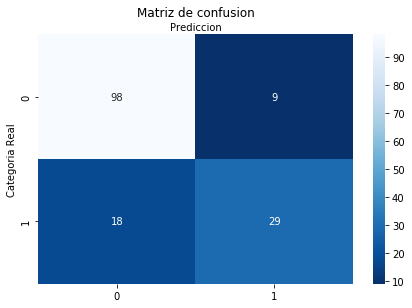

In [27]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confu_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Categoria Real")
plt.xlabel("Prediccion")

In [28]:
metrics.accuracy_score(Y_test,y_pred)

0.8246753246753247

<img src='./imagenes/confu_mat.png'>

- Los verdaderos positivos (VP) son aquellos que fueron clasificados correctamente como positivos como el modelo.

- Los verdaderos negativos (VN) corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.

- Los falsos negativos (FN) es la cantidad de positivos que fueron clasificados incorrectamente como negativos.

- Los falsos positivos (FP) indican la cantidad de negativos que fueron clasificados incorrectamente como positivos.

**Métricas**

$Exactitud \, = \, \frac{VP + VN}{Total}$

$Error \, = \, \frac{FN + FP}{Total}$
